<b>Summary:</b> Using cifar dataset from torchvission of pytorch to create CNN classifier from scratch

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms


In [5]:
trainset = torchvision.datasets.CIFAR10(root ='./datasets', train = True,
                                       download=True, transform = transforms.ToTensor())

Files already downloaded and verified


In [6]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
trainloader = torch.utils.data.DataLoader(trainset,
                                                 batch_size = 8, 
                                                 shuffle = True,
                                                num_workers = 2)

In [12]:
testset = torchvision.datasets.CIFAR10(root = './datasets',
                                      train = False,
                                      download = True,
                                      transform = transforms.ToTensor())

Files already downloaded and verified


In [13]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
testloader = torch.utils.data.DataLoader(testset,
                                                 batch_size = 8, 
                                                 shuffle = True,
                                                num_workers = 2)

In [15]:
labels = ('plane', 'car', 'bird', 'cat','deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')

In [16]:
import matplotlib.pyplot as plt 
import numpy as np

In [17]:
image_batch, label_batch = iter(trainloader).next()

In [18]:
image_batch.shape

torch.Size([8, 3, 32, 32])

In [19]:
img = torchvision.utils.make_grid(image_batch)

In [20]:
img.shape

torch.Size([3, 36, 274])

In [21]:
np.transpose(img, (1, 2, 0)).shape

torch.Size([36, 274, 3])

(-0.5, 273.5, 35.5, -0.5)

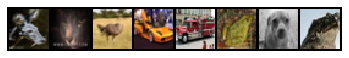

In [23]:
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('Off')

In [25]:
import torch.nn as nn

In [24]:
in_size = 3
hid1_size = 16
hid2_size = 32
out_size = len(labels)
k_conv_size = 5 

In [45]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size)
        
        
       
    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
            
        return out    

In [46]:
model = ConvNet()

In [47]:
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), 
                            lr = learning_rate)

In [49]:
total_step = len(trainloader)

num_epoch = 5

for epoch in range(num_epoch):
    
    for i, (images, labels) in enumerate(trainloader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}], step [{}/{}], Loss: {:.4f}'
                 .format(epoch+1, num_epoch, i+1, total_step, loss.item()))

Epoch [1/5], step [2000/6250], Loss: 1.6690
Epoch [1/5], step [4000/6250], Loss: 1.7959
Epoch [1/5], step [6000/6250], Loss: 1.7693
Epoch [2/5], step [2000/6250], Loss: 0.9547
Epoch [2/5], step [4000/6250], Loss: 0.8398
Epoch [2/5], step [6000/6250], Loss: 0.7580
Epoch [3/5], step [2000/6250], Loss: 1.3755
Epoch [3/5], step [4000/6250], Loss: 1.5871
Epoch [3/5], step [6000/6250], Loss: 1.7354
Epoch [4/5], step [2000/6250], Loss: 0.9728
Epoch [4/5], step [4000/6250], Loss: 0.8512
Epoch [4/5], step [6000/6250], Loss: 0.9682
Epoch [5/5], step [2000/6250], Loss: 0.7362
Epoch [5/5], step [4000/6250], Loss: 0.9988
Epoch [5/5], step [6000/6250], Loss: 1.0336


In [ ]:
total_step = len(trainloader)
num_epochs = 5


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


In [54]:
model.eval()
with torch.no_grad():
    
    
    correct = 0
    total = 0
    
    for images, labels in testloader:
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        print('Accuracy of the model on the 10000 test images: {}'
             .format(100 * correct / total))

Accuracy of the model on the 10000 test images: 62.5
Accuracy of the model on the 10000 test images: 62.5
Accuracy of the model on the 10000 test images: 75.0
Accuracy of the model on the 10000 test images: 65.625
Accuracy of the model on the 10000 test images: 60.0
Accuracy of the model on the 10000 test images: 60.416666666666664
Accuracy of the model on the 10000 test images: 60.714285714285715
Accuracy of the model on the 10000 test images: 60.9375
Accuracy of the model on the 10000 test images: 62.5
Accuracy of the model on the 10000 test images: 62.5
Accuracy of the model on the 10000 test images: 61.36363636363637
Accuracy of the model on the 10000 test images: 58.333333333333336
Accuracy of the model on the 10000 test images: 58.65384615384615
Accuracy of the model on the 10000 test images: 59.82142857142857
Accuracy of the model on the 10000 test images: 59.166666666666664
Accuracy of the model on the 10000 test images: 59.375
Accuracy of the model on the 10000 test images: 60

Accuracy of the model on the 10000 test images: 67.47047244094489
Accuracy of the model on the 10000 test images: 67.45098039215686
Accuracy of the model on the 10000 test images: 67.529296875
Accuracy of the model on the 10000 test images: 67.60700389105058
Accuracy of the model on the 10000 test images: 67.63565891472868
Accuracy of the model on the 10000 test images: 67.66409266409266
Accuracy of the model on the 10000 test images: 67.54807692307692
Accuracy of the model on the 10000 test images: 67.48084291187739
Accuracy of the model on the 10000 test images: 67.50954198473282
Accuracy of the model on the 10000 test images: 67.53802281368822
Accuracy of the model on the 10000 test images: 67.42424242424242
Accuracy of the model on the 10000 test images: 67.40566037735849
Accuracy of the model on the 10000 test images: 67.5281954887218
Accuracy of the model on the 10000 test images: 67.5561797752809
Accuracy of the model on the 10000 test images: 67.53731343283582
Accuracy of the m

Accuracy of the model on the 10000 test images: 67.14711729622266
Accuracy of the model on the 10000 test images: 67.16269841269842
Accuracy of the model on the 10000 test images: 67.15346534653466
Accuracy of the model on the 10000 test images: 67.14426877470356
Accuracy of the model on the 10000 test images: 67.13510848126232
Accuracy of the model on the 10000 test images: 67.1259842519685
Accuracy of the model on the 10000 test images: 67.14145383104126
Accuracy of the model on the 10000 test images: 67.20588235294117
Accuracy of the model on the 10000 test images: 67.24559686888453
Accuracy of the model on the 10000 test images: 67.2607421875
Accuracy of the model on the 10000 test images: 67.20272904483431
Accuracy of the model on the 10000 test images: 67.21789883268482
Accuracy of the model on the 10000 test images: 67.23300970873787
Accuracy of the model on the 10000 test images: 67.24806201550388
Accuracy of the model on the 10000 test images: 67.23887814313346
Accuracy of the

Accuracy of the model on the 10000 test images: 67.22074468085107
Accuracy of the model on the 10000 test images: 67.19787516600266
Accuracy of the model on the 10000 test images: 67.20822281167109
Accuracy of the model on the 10000 test images: 67.18543046357615
Accuracy of the model on the 10000 test images: 67.19576719576719
Accuracy of the model on the 10000 test images: 67.20607661822986
Accuracy of the model on the 10000 test images: 67.18337730870712
Accuracy of the model on the 10000 test images: 67.19367588932806
Accuracy of the model on the 10000 test images: 67.1875
Accuracy of the model on the 10000 test images: 67.18134034165571
Accuracy of the model on the 10000 test images: 67.1751968503937
Accuracy of the model on the 10000 test images: 67.18545216251638
Accuracy of the model on the 10000 test images: 67.17931937172774
Accuracy of the model on the 10000 test images: 67.17320261437908
Accuracy of the model on the 10000 test images: 67.15078328981723
Accuracy of the model

Accuracy of the model on the 10000 test images: 67.15784215784215
Accuracy of the model on the 10000 test images: 67.16566866267465
Accuracy of the model on the 10000 test images: 67.16101694915254
Accuracy of the model on the 10000 test images: 67.15637450199203
Accuracy of the model on the 10000 test images: 67.15174129353234
Accuracy of the model on the 10000 test images: 67.15954274353876
Accuracy of the model on the 10000 test images: 67.16732869910625
Accuracy of the model on the 10000 test images: 67.1875
Accuracy of the model on the 10000 test images: 67.19524281466799
Accuracy of the model on the 10000 test images: 67.20297029702971
Accuracy of the model on the 10000 test images: 67.19831849653808
Accuracy of the model on the 10000 test images: 67.18132411067194
Accuracy of the model on the 10000 test images: 67.17670286278381
Accuracy of the model on the 10000 test images: 67.19674556213018
Accuracy of the model on the 10000 test images: 67.21674876847291
Accuracy of the mode

Accuracy of the model on the 10000 test images: 67.51401120896718
Accuracy of the model on the 10000 test images: 67.5
